In [1]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import os
from tqdm import tqdm

In [10]:
# x shift from original image
# y shift from original 
# 360 degree rotations
# brightening
# blurring
# small zoom

transform = v2.Compose([
    v2.RandomRotation(180),
    v2.ColorJitter(brightness=0.2),
    v2.GaussianBlur(5, (0.1,2)),
    #v2.RandomZoomOut(side_range=(1., 1.2), p=0.5)
])

def augment(base):
    base = np.expand_dims(np.transpose(base[...,:3],(2,0,1)), axis=0)
    dataset = torch.tensor(base[...,560-200:1680+200,950-200:2630+200])
    for i in tqdm(range(132)):
        x = int(np.random.uniform(-200,200))
        y = int(np.random.uniform(-200,200))
        temp = base[...,560-200 +y:1680+200+y,950-200+x:2630+200+x]
        dataset = torch.vstack((dataset, torch.tensor(temp)))
    dataset = v2.Resize(size=(760,1040))(dataset)
    for i in tqdm(range(len(dataset))):
        dataset = torch.vstack((dataset,transform(dataset[i:i+1,...]), transform(dataset[i:i+1,...])))
    dataset = v2.CenterCrop((560,840))(dataset)
    return dataset


In [11]:
directory = "C:/Users/20pj2/Documents/Cs1430/finalproj/StellarBodies/raw_data_2"
# img_out = torch.empty((0,3,560,840))
# labels_out = torch.empty((0,1))
i = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    img = ski.io.imread(f)
    out = augment(img)
    label = torch.ones((len(out), 1)) * i
    # img_out = torch.vstack((img_out, out))
    # labels_out = torch.vstack((labels_out, label))
    torch.save(out,f"../data_2/images{i}.pt")
    torch.save(label,f"../data_2/labels{i}.pt")
    print(f"done {i}")
    i+=1

# torch.save(img_out,"images.pt")
# torch.save(labels_out,"labels.pt")


100%|██████████| 133/133 [00:52<00:00,  2.53it/s]


done 0


100%|██████████| 133/133 [00:53<00:00,  2.47it/s]


done 1


100%|██████████| 133/133 [00:53<00:00,  2.47it/s]


done 2


100%|██████████| 133/133 [00:53<00:00,  2.49it/s]


done 3


100%|██████████| 133/133 [00:53<00:00,  2.48it/s]


done 4


100%|██████████| 133/133 [00:54<00:00,  2.46it/s]


done 5


100%|██████████| 133/133 [00:53<00:00,  2.48it/s]


done 6


100%|██████████| 133/133 [00:54<00:00,  2.43it/s]


done 7


100%|██████████| 133/133 [00:53<00:00,  2.50it/s]


done 8


100%|██████████| 133/133 [00:53<00:00,  2.50it/s]


done 9


In [12]:
im_list = []
lable_list = []
for i in range(10):
    im_list.append(torch.load(f"../data_2/images{i}.pt"))
    lable_list.append(torch.load(f"../data_2/labels{i}.pt"))

im_list = torch.cat(im_list, 0)
lable_list = torch.cat(lable_list,0)
torch.save(im_list, "../data_2/images.pt")
torch.save(lable_list,"../data_2/labels.pt")

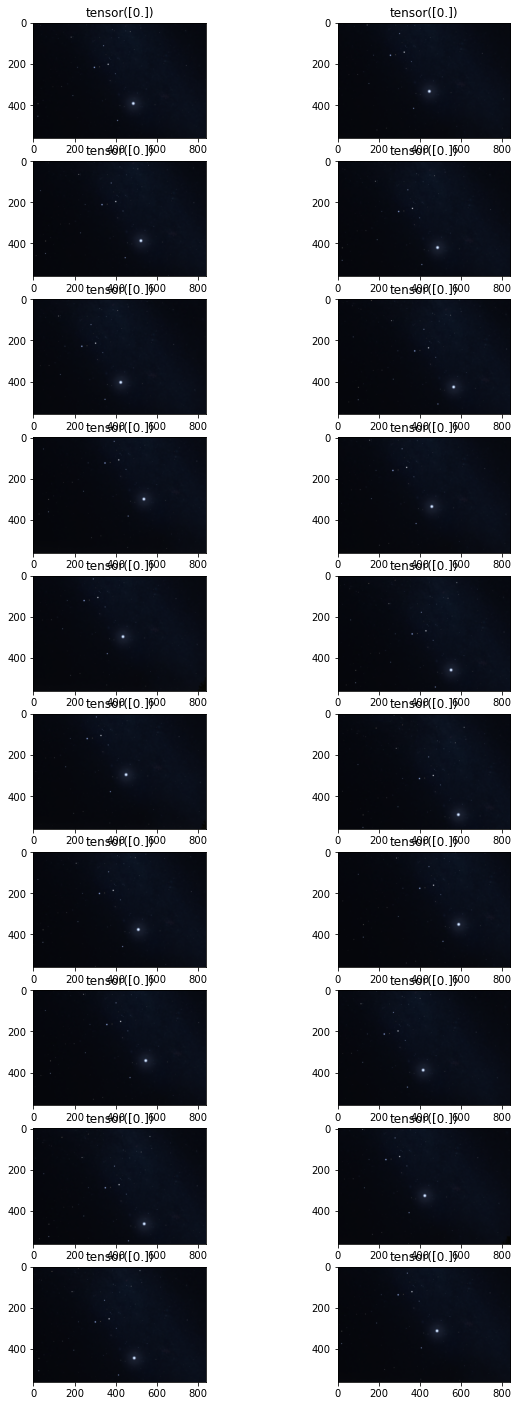

In [13]:
ims = torch.load("../data_2/images.pt")
labs = torch.load("../data_2/labels.pt")
_, axs = plt.subplots(10,2, figsize=(10, 25))
axs = axs.flatten()
for img, lab, ax in zip(ims, labs, axs):
    img = torch.permute(img,(1,2,0)).int()
    ax.imshow(img)
    ax.set_title(lab)
plt.show()